# <font color = 'pickle'> **HW4_Part B  (5 Points):**</font> 

Required Submissions:
1.  Submit  colab/jupyter notebooks only.
2. **Name files as follows : FirstName_hw4_part_B**

<font size = 5, color = 'indianred'>**Refactor the code using Pytorch's nn.Module.** 



# <Font color = 'pickle'>**Install/Import Libraries**

In [64]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
else:
  print('Not running on CoLab')

Running on CoLab


In [65]:
# Install wandb and update it to the latest version
if 'google.colab' in str(get_ipython()):
    !pip install wandb --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 21.6 MB/s 
  Attempting uninstall: wandb
    Found existing installation: wandb 0.13.3
    Uninstalling wandb-0.13.3:
      Successfully uninstalled wandb-0.13.3


In [66]:
# mount google drive
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# Importing the necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from pathlib import Path
import wandb
import os

In [68]:
%env 'WANDB_NOTEBOOK_NAME' 'Hw4_Softmax_Scratch_CIFAR10.ipynb'
# in the above line we are specyfying the jupyter(colab) notebook name for wandb
# Login to W&B
wandb.login()

env: 'WANDB_NOTEBOOK_NAME'='Hw4_Softmax_Scratch_CIFAR10.ipynb'


True

# <Font color = 'pickle'>**CIFAR10 Dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Categories present in the dataset:

 <font color = 'indianred'>**['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', horse', 'ship', 'truck']**</font>

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks

Let us download the dataset using some built-in functions.

We will first convert the images in the dataset to pytorch tensors using torchvision.transforms and then normalize them.

Next, we will use torchvision.datasets for downloading the CIFAR10 datasets and apply transform that we defines earlier. 

- `trainset` conains the training data
- `testset` contains the testing data

In [69]:
# This is the path where we will downlaod and save data
if 'google.colab' in str(get_ipython()):
    data_folder = Path('/content/drive/MyDrive/Deep_Learning_UTD/Dataset')
else:
    data_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets')

## <Font color = 'pickle'>**Train and Test Dataset**


In [70]:
# Transform to convert images to pytorch tensors
trans1 = transforms.ToTensor()

# Transform to normalize the data
# The mean and std are based on train subset which we will create below
trans2 = transforms.Normalize((0.49, 0.482, 0.447), (0.247, 0.244, 0.262))
trans = transforms.Compose([trans1, trans2])

# Download the training_validation data (we will create two subsets - trainset and valset frpm this)
train_val_set = torchvision.datasets.CIFAR10(root = data_folder, 
                                             train = True, 
                                             transform = trans, 
                                             download = True)

# Download the testing data
testset = torchvision.datasets.CIFAR10(root = data_folder, 
                                            train = False, 
                                            transform = trans, 
                                            download = True)

Files already downloaded and verified
Files already downloaded and verified


## <Font color = 'pickle'>**Split train set to train/validation set**

In [71]:
def split_dataset(base_dataset, fraction, seed):
    split_a_size = int(fraction * len(base_dataset))
    split_b_size = len(base_dataset) - split_a_size
    return torch.utils.data.random_split(base_dataset, [split_a_size, split_b_size], generator=torch.Generator().manual_seed(seed)
    )

In [72]:
trainset, validset = split_dataset(train_val_set, 0.8, 42)

In [73]:
# Since the transforms are not applied, we will manually first divide by 255
# we will then get the mean and std dev 
# the images are still in mumpy with the shape (number of images, H, W, Channels)
# Since we need mean, std dev 
train_data = train_val_set.data[trainset.indices]/255
train_data.shape
print(train_data.mean(axis = (0,1,2)))
print(train_data.std(axis = (0,1,2)))

[0.49171654 0.48256152 0.44711783]
[0.24705465 0.24350537 0.26166664]


## <Font color = 'pickle'>**Check inputs**

In [74]:
print(type(trainset), type(trainset.dataset), type(trainset.indices), sep ='\n')

<class 'torch.utils.data.dataset.Subset'>
<class 'torchvision.datasets.cifar.CIFAR10'>
<class 'list'>


In [75]:
trainset.indices[0:5]

[37542, 44491, 216, 43688, 41558]

In [76]:
print(len(trainset), len(trainset.dataset), len(trainset.indices), sep ='\n')

40000
50000
40000


In [77]:
# Shape of training data
len(trainset.indices), len(validset.indices)

(40000, 10000)

In [78]:
print(train_val_set.data[trainset.indices].shape)
print(trainset.dataset.data[trainset.indices].shape)

(40000, 32, 32, 3)
(40000, 32, 32, 3)


In [79]:
train_val_set.data[validset.indices].shape

(10000, 32, 32, 3)

In [80]:
# Shape of testing data
testset.data.shape

(10000, 32, 32, 3)

In [81]:
# check the max value of inputs - the transformation are not yet applied.
# the transofrmation are applied iteratively on batches 
# when we craete batch by iterating over dataloader
train_val_set.data[trainset.indices].max()

255

In [82]:
# check the min value of inputs
train_val_set.data[trainset.indices].min()

0

In [83]:
# Since the transforms are not applied, we will manually first divide by 255
# we will then get the mean and std dev 
# the images are still in mumpy with the shape (number of images, H, W, Channels)
# Since we need mean, std dev 
train_data = train_val_set.data[trainset.indices]/255
train_data.shape
print(train_data.mean(axis = (0,1,2)))
print(train_data.std(axis = (0,1,2)))

[0.49171654 0.48256152 0.44711783]
[0.24705465 0.24350537 0.26166664]


## <Font color = 'pickle'>**Check Labels**

In [84]:
# check target values for train set
train_val_targets = torch.tensor(train_val_set.targets)
train_val_targets[trainset.indices].shape

torch.Size([40000])

In [85]:
# Unique Target values
train_val_targets[trainset.indices].unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
train_val_targets[validset.indices].unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [87]:
torch.tensor(testset.targets).unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# <Font color = 'pickle'>**Data Loaders**

The next step is to create dataloader for train, valid, and test set using pytorch dataloader. This will be an iterator that will provide dataset in batches.  Let's keep batch size as 256. 

In [88]:
# Initializing the batch size
batch_size = 256

# Creating data loader for train set
train_loader = torch.utils.data.DataLoader(dataset = trainset, 
                                            batch_size = batch_size, 
                                            shuffle = True)

valid_loader = torch.utils.data.DataLoader(dataset = validset, 
                                            batch_size = batch_size, 
                                            shuffle = False)

# Creating data loader for test set
test_loader = torch.utils.data.DataLoader(dataset = testset, 
                                          batch_size = batch_size, 
                                          shuffle = False)

In [89]:
# check number of batches
len(train_loader)

157

In [90]:
# check total training examples
len(train_loader.dataset)

40000

In [91]:
# check imputs and outputs 
for input, target in train_loader:
  print(f'shape of inputs is :{input.shape}')
  print(f'\nmax input value  :{input.max()}')
  print(f'\nmin input value  :{input.min()}')
  print(f'\nmean input value  :{input.mean()}')
  print(f'\nstd input value  :{input.std()}')
  print(f'\nshape of targets is :{target.shape}')
  print(f'\ninputs  :{input[0, 0, 5:10, 5:10]}')
  
  break

shape of inputs is :torch.Size([256, 3, 32, 32])

max input value  :2.122950792312622

min input value  :-1.983805775642395

mean input value  :0.0439605712890625

std input value  :1.0289740562438965

shape of targets is :torch.Size([256])

inputs  :tensor([[ 0.8264,  1.9536,  1.5091,  0.5247, -0.7613],
        [-1.2058, -0.3009, -0.9359, -1.2535, -1.2693],
        [-1.3329, -1.2852, -0.8248, -0.4438, -0.4279],
        [ 0.0643, -0.8724, -1.0312, -0.6343, -0.3009],
        [ 0.0643, -0.5231, -1.0947, -0.9518, -0.4279]])


# <Font color = 'pickle'>**Visualize the Data**

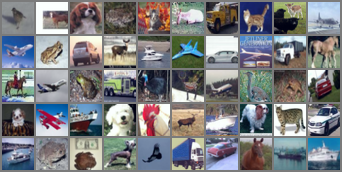

In [92]:
# Get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# Create grid of images
img_grid = torchvision.utils.make_grid(images[0:50], nrow = 10)

# Logging to W&B
images = wandb.Image(img_grid, caption = "Sample images")
images.image

In [93]:
# Define the values for classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# <font color = 'pickle'> **Functions to implement Softmax**

Now, we will start implementing our Softmax Regression Model from scratch.

We will now create following functions:

- **Model**
- **Loss Function** 
- **One Hot Encoding**
- **Training Loop for 1 epoch**
- **Validation Loop for 1 epoch**
- **Model Training** - repeat the training and validation loops for given number of epochs
- **Function to get the accuracy given the model**

## <Font color = 'pickle'>**Function to define Model**

It has two steps :
- Calculate output as a linerar function of inputs
$$o_k^{(i)}  = \mathbf{x^{(i)}}\mathbf{w_k} ^T+b_k$$
- Apply softmax on output to get probabilities
$$\hat{p_k}^{(i)} = softmax(o_k^{(i)}) = \frac{e^{o_k^{(i)}}}{\sum_{j=1}^{K} e^{o_j^{(i)}}}$$

Softmax operation consists of three steps: 
- Exponentiate each term.
- Sum over each row to get the normalization constant for each example.
- Divide each row by its normalization constant.

This is given by:

We will first define the function for softmax operation.

In [94]:
import torch.nn as nn

In [95]:
def softmax_reg(n_ins, n_outs, bias):
  return nn.Sequential(nn.Flatten(), nn.Linear(n_ins, n_outs))

## <Font color = 'pickle'>**One-Hot Encoding- Encode Labels**

A one-hot encoding is a vector with as many components as the labels. The component corresponding to particular instance’s label is set to 1 and all other components are set to 0. 

Suppose we have a dataset with 3 classes `{cat, dog, parrot}`. Now, if an image is a dog, it's one-hot encoded vector will be `{0, 1, 0}`.

One-hot encoded vector for the all the 3 different classes:

cat: {1, 0, 0}

dog: {0, 1, 0}

parrot: {0, 0, 1}

## <Font color = 'pickle'>**Function for Training  Loops**

**Model Training** involves five steps: 

- Step 0: Randomly initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Repeat steps 1 - 4

Model training is repeating this process over and over, for many **epochs**.

We will specify number of ***epochs*** and during each epoch we will iterate over the complete dataset and will keep on updating the parameters.

***Learning rate*** and ***epochs*** are known as hyperparameters. We have to adjust the values of these two based on validation dataset.

We will now create functions for step 1 to 4.

In [96]:
def train(train_loader, loss_function, model, optimizer, grad_clipping, max_norm, log_batch, log_interval):

  

  #Global variable to keep track of the epoch count

  global batch_ct_train
  
  running_train_loss = 0
  running_train_correct = 0

  model.train()
  
  # Iterate on batches from the dataset using train_loader
  for input_, targets in train_loader:
    
    # move inputs and outputs to GPUs
    input_ = input_.to(device)
    targets = targets.to(device)

    # # one hot encoding for target variable
    # target_encoded = one_hot_labels(targets, num_outputs, device = device)

    # Step 1: Forward Pass: Compute model's predictions 
    output = model(input_)
    
    # Step 2: Compute loss
    loss = loss_function(output, targets)

    # Correct prediction
    y_pred = torch.argmax(output, dim = 1)
    correct = torch.sum(y_pred == targets)

    batch_ct_train += 1

    # Step 3: Backward pass -Compute the gradients
    optimizer.zero_grad()
    loss.backward()

    # Gradient Clipping
    if grad_clipping:
      nn.utils.clip_grad_norm_(model.parameters(), max_norm= max_norm, norm_type = 2)


    # Step 4: Update the parameters
    optimizer.step()
          
    # Add train loss of a batch 
    running_train_loss += loss.item()

    # Add Corect counts of a batch
    running_train_correct += correct

    #Make wandb log of the batch loss and accuracy
    if log_batch:
      if ((batch_ct_train + 1) % log_interval) == 0:
        wandb.log({f"Train Batch Loss  :": loss})
        wandb.log({f"Train Batch Acc :": correct/len(targets)})

        
  # Calculate mean train loss for the whole dataset for a particular epoch
  train_loss = running_train_loss/len(train_loader)

  # Calculate accuracy for the whole dataset for a particular epoch
  train_acc = running_train_correct/len(train_loader.dataset)
  

  return train_loss, train_acc

## <Font color = 'pickle'>**Function for Validation Loops**


In [97]:
def validate(valid_loader, loss_function, model, log_batch, log_interval):

  """ 
  Function for calcuilating loss and prediction for validataion dataset. 
  Input: iterator for validation dataset, estimated weights and bias at the end of epoch in training loop, 
  learning rate,   loss function, model
  Output: val loss and accuracy for each epoch.
  """


  global batch_ct_valid
  # Validation loop
  # Initialize valid_loss at the he strat of the epoch
  
  running_val_loss = 0
  running_val_correct = 0


  model.eval()
  
  with torch.no_grad():
    for input_,targets in valid_loader:

      # move inputs and outputs to GPUs
      input_ = input_.to(device)
      targets = targets.to(device)

      # Step 1: Forward Pass: Compute model's predictions 
      output = model(input_)
      
      # Step 2: Compute loss
      loss = loss_function(output, targets)

      # Correct Predictions
      y_pred = torch.argmax(output, dim = 1)
      correct = torch.sum(y_pred == targets)

      batch_ct_valid += 1

      # Add val loss of a batch 
      running_val_loss += loss.item()

      # Add correct count for each batch
      running_val_correct += correct

       # log batch loss and accuracy
      if log_batch:
          if ((batch_ct_valid + 1) % log_interval) == 0:
            wandb.log({f"Valid Batch Loss  :": loss})
            wandb.log({f"Valid Batch Accuracy :": correct/len(targets)})

    # Calculate mean val loss for the whole dataset for a particular epoch
    val_loss = running_val_loss/len(valid_loader)

    # Calculate accuracy for the whole dataset for a particular epoch
    val_acc = running_val_correct/len(valid_loader.dataset)
      
    return val_loss, val_acc

## <Font color = 'pickle'>**Function for Model Training**
    
We will now create a function for step 5 of model training


In [98]:
from datetime import datetime

In [99]:
def train_loop(train_loader, valid_loader, model, optimizer, loss_function, epochs, device, patience, early_stopping,
               file_model):
    
  

  # Create lists to store train and val loss at each epoch
  train_loss_history = []
  valid_loss_history = []
  train_acc_history = []
  valid_acc_history = []

  # initialize variables for early stopping

  delta = 0
  best_score = None
  valid_loss_min = np.Inf
  counter_early_stop=0
  early_stop=False

  # Iterate for the given number of epochs
  # Step 5: Repeat steps 1 - 4

  for epoch in range(epochs):

    t0 = datetime.now()

    # Get train loss and accuracy for one epoch
    train_loss, train_acc = train(train_loader, loss_function, model, optimizer, 
                                  wandb.config.grad_clipping, wandb.config.max_norm,
                                  wandb.config.log_batch, wandb.config.log_interval)
    valid_loss, valid_acc   = validate(valid_loader, loss_function, model, wandb.config.log_batch, wandb.config.log_interval)

    dt = datetime.now() - t0

    # Save history of the Losses and accuracy
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    valid_loss_history.append(valid_loss)
    valid_acc_history.append(valid_acc)

    # Log the train and valid loss to wandb
    wandb.log({f"Train Loss :": train_loss, "epoch": epoch})
    wandb.log({f"Train Acc :": train_acc, "epoch": epoch})

    wandb.log({f"Valid Loss :": valid_loss, "epoch": epoch})
    wandb.log({f"Valid Acc :": valid_acc, "epoch": epoch})


    if early_stopping:
      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        counter_early_stop += 1
        print(f'Early stoping counter: {counter_early_stop} out of {patience}')
        if counter_early_stop > patience:
          early_stop = True

      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        counter_early_stop=0
        valid_loss_min = valid_loss

      if early_stop:
        print('Early Stopping')
        break

    else:

      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        print(f'Validation loss has not decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Not Saving Model...')
      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss
    
    # Print the train loss and accuracy for given number of epochs, batch size and number of samples
    print(f'Epoch : {epoch+1} / {epochs}')
    print(f'Time to complete {epoch+1} is {dt}')
    # print(f'Learning rate: {scheduler._last_lr[0]}')
    print(f'Train Loss: {train_loss : .4f} | Train Accuracy: {train_acc * 100 : .4f}%')
    print(f'Valid Loss: {valid_loss : .4f} | Valid Accuracy: {valid_acc * 100 : .4f}%')
    print()
    torch.cuda.empty_cache()

  return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

## <Font color = 'pickle'>**Function for Accuracy and Predictions**

Now we have final values for weights and bias after training the model. We will use these values to make predictions on the test dataset.

In [100]:
def get_acc_pred(data_loader, model, device):
    
  """ 
  Function to get predictions and accuracy for a given data using estimated model
  Input: Data iterator, Final estimated weoights, bias
  Output: Prections and Accuracy for given dataset
  """

  # Array to store predicted labels
  predictions = torch.Tensor() # empty tensor
  predictions = predictions.to(device) # move predictions to GPU

  # Array to store actual labels
  y = torch.Tensor() # empty tensor
  y = y.to(device)

  model.eval()


  # Iterate over batches from data iterator
  with torch.no_grad():
    for input_, targets in data_loader:
      
      # move inputs and outputs to GPUs
      input_ = input_.to(device)
      targets = targets.to(device)

      # Calculated the predicted labels
      output = model(input_)

      # Choose the label with maximum probability
      prediction = torch.argmax(output, dim = 1)

      # Add the predicted labels to the array
      predictions = torch.cat((predictions, prediction)) 

      # Add the actual labels to the array
      y = torch.cat((y, targets)) 

  # Check for complete dataset if actual and predicted labels are same or not
  # Calculate accuracy
  acc = (predictions == y).float().mean()

  # Return tuple containing predictions and accuracy
  return predictions, acc  

# <Font color = 'pickle'>**Hyperparameters**

In [101]:
!pip install types

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement types (from versions: none)
ERROR: No matching distribution found for types


In [102]:
from types import SimpleNamespace

hyperparameters = SimpleNamespace(
    epochs = 20,
    input_dim = 3072,
    output_dim = 10,
    batch_size=256,
    learning_rate=0.01,
    dataset="CIFAR10",
    architecture="SoftmaxReg",
    log_interval = 25,
    log_batch = True,
    file_model = data_folder/'CIFAR10.pt',
    grad_clipping = False,
    max_norm = 1,
    momentum = 0.9,
    patience = 3,
    early_stopping = True,
    # scheduler_factor = 0.5,
    # scheduler_patience = 0,
    weight_decay = 0.00
    )

In [103]:
# Initialize a new project
import random
wandb.init(name = "Refactor_CIFAR", project = 'dl22_HW4')

In [104]:
wandb.config = hyperparameters
wandb.config

namespace(architecture='SoftmaxReg', batch_size=256, dataset='CIFAR10', early_stopping=True, epochs=20, file_model=PosixPath('/content/drive/MyDrive/Deep_Learning_UTD/Dataset/CIFAR10.pt'), grad_clipping=False, input_dim=3072, learning_rate=0.01, log_batch=True, log_interval=25, max_norm=1, momentum=0.9, output_dim=10, patience=3, weight_decay=0.0)

In [105]:
# Fix seed value
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Data Loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=wandb.config.batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(validset, batch_size=wandb.config.batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=wandb.config.batch_size,   shuffle = False)

# device 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

wandb.config.device = device

# model
model = softmax_reg(wandb.config.input_dim, wandb.config.output_dim, bias=True)

# Initialize weights from normal distribution with mean 0 and standard deviation 0.01
def init_weights(layer):
  if type(layer) == nn.Linear:
    torch.nn.init.normal_(layer.weight, mean = 0, std = 1/3072**0.5)
    torch.nn.init.zeros_(layer.bias)

model.to(wandb.config.device)
model.apply(init_weights)

# loss_function
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), 
                            lr = wandb.config.learning_rate, 
                            momentum = wandb.config.momentum,
                            weight_decay = wandb.config.weight_decay)

# <Font color = 'pickle'>**Training Model**

In [106]:
# See live graphs in the notebook.
#%%wandb 
batch_ct_train, batch_ct_valid = 0, 0
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_loop(train_loader, 
                                                                                          valid_loader, 
                                                                                          model, 
                                                                                          optimizer, 
                                                                                          loss_function, 
                                                                                          wandb.config.epochs, 
                                                                                          wandb.config.device,
                                                                                          wandb.config.patience,
                                                                                          wandb.config.early_stopping,
                                                                                          wandb.config.file_model,
                                                                                          )

Validation loss has decreased (inf --> 2.010289). Saving Model...
Epoch : 1 / 20
Time to complete 1 is 0:00:15.600171
Train Loss:  2.0359 | Train Accuracy:  32.7775%
Valid Loss:  2.0103 | Valid Accuracy:  33.9400%

Early stoping counter: 1 out of 3
Epoch : 2 / 20
Time to complete 2 is 0:00:09.571310
Train Loss:  1.9297 | Train Accuracy:  35.5750%
Valid Loss:  2.1792 | Valid Accuracy:  30.0900%

Early stoping counter: 2 out of 3
Epoch : 3 / 20
Time to complete 3 is 0:00:09.603482
Train Loss:  1.9292 | Train Accuracy:  36.3200%
Valid Loss:  2.0936 | Valid Accuracy:  32.6100%

Early stoping counter: 3 out of 3
Epoch : 4 / 20
Time to complete 4 is 0:00:09.453912
Train Loss:  1.8861 | Train Accuracy:  37.8125%
Valid Loss:  2.2303 | Valid Accuracy:  32.8000%

Validation loss has decreased (2.010289 --> 1.988589). Saving model...
Epoch : 5 / 20
Time to complete 5 is 0:00:10.357246
Train Loss:  1.9154 | Train Accuracy:  37.1200%
Valid Loss:  1.9886 | Valid Accuracy:  35.4300%

Early stoping co

We can observe that with each epoch, our loss is getting reduced.

# <Font color = 'pickle'>**Get Accuracy, Predictions**

In [107]:
model_softmax = softmax_reg(wandb.config.input_dim, wandb.config.output_dim, bias=True)
model_softmax.to(device)
model_softmax.load_state_dict(torch.load(wandb.config.file_model))

<All keys matched successfully>

In [108]:
# Get the prediction and accuracy for the test dataseta
predictions_test, acc_test = get_acc_pred(test_loader, model_softmax, device)
predictions_train, acc_train = get_acc_pred(train_loader, model_softmax, device)
predictions_valid, acc_valid = get_acc_pred(valid_loader, model_softmax, device)

In [109]:
# Print Test Accuracy
print('Test accuracy', acc_test * 100)
print('Train accuracy', acc_train * 100)
print('Valid accuracy', acc_valid * 100)

Test accuracy tensor(34.8400, device='cuda:0')
Train accuracy tensor(39.1600, device='cuda:0')
Valid accuracy tensor(35.4300, device='cuda:0')


In [110]:
wandb.log({'Best_test_Acc': acc_test})
wandb.log({'Best_train_Acc': acc_train})
wandb.log({'Best_valid_Acc': acc_valid})

# <Font color = 'pickle'>**Confusion Matrix for Test Data**

Now, we will make some visualizations for the predictions that we obtained.

We will construct a `confusion matrix` which will help us to visualize the performance of our classification model on the test dataset as we know the true values for the test data.

In [111]:
# Get an array containing actual labels
testing_labels = np.array(testset.targets)

In [112]:
np.unique(testing_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [113]:
# Log a confusion matrix to W&B
wandb.log({"conf_mat" : wandb.plot.confusion_matrix(
                        probs = None,
                        y_true = testing_labels,
                        preds = predictions_test.to('cpu').numpy(),
                        class_names = classes)})


In [114]:
wandb.finish()

Best_test_Acc,▁
Best_train_Acc,▁
Best_valid_Acc,▁
Train Acc :,▁▄▅▇▆▆█▇█
Train Batch Acc :,▁▂▁▄▄▄▇▆▄▄▆▇▄▅▄▆▆▄▃▆▅█▅▅▆▄▆▇▆▆▄▅▅▄█▆▄██▇
Train Batch Loss :,▅▅█▄▄▄▂▃▂▃▂▂▂▃▄▃▂▂▅▁▁▁▂▃▁▃▃▂▃▂▅▃▄▃▂▂▄▂▁▂
Train Loss :,█▄▄▃▄▃▂▂▁
Valid Acc :,▆▁▄▄█▇▆▆█
Valid Batch Accuracy :,▆▅▁▆▆▅▆▅█▅▅▇▆▇
Valid Batch Loss :,▁▄█▃▅█▁▄▂▂▅▁▁▄
Valid Loss :,▂▇▄█▁▂▃▂▂


# My Report

- Project URL: https://wandb.ai/pranavshekhar2/dl22_HW4?workspace=user-pranavshekhar2
- Conclusion - Learning rate of 0.01 was at lower side and we will need to train the model for more epochs. Also early stopping happens at around 8 epochs.